# "Can you predict COVID deaths by food habits?"

In [1]:
# Dependencies
import pandas as pd

import numpy as np
from matplotlib import pyplot as plt

import requests

# Objective
### We want to analyse the data to see if healthy diet plays a factor in low death rate due to COVID-19

In [2]:
# File Path
diet_data_file = "datasets_618335_1395643_Food_Supply_Quantity_kg_Data.csv"

# Read CSV
diet_data = pd.read_csv(diet_data_file)

# Show Data
diet_data

,Country,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetables,Vegetal Products,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Afghanistan,0.0014,0.1973,9.4341,0.0000,24.8097,0.2099,0.0350,5.3495,1.2020,...,6.7642,40.5645,4.5,29.8,0.094302,0.003298,0.065531,0.025473,38928000.0,%
1,Albania,1.6719,0.1357,18.7684,0.0000,5.7817,0.5815,0.2126,6.7861,1.8845,...,11.7753,31.2304,22.3,6.2,0.194468,0.005849,0.106342,0.082276,2838000.0,%
2,Algeria,0.2711,0.0282,9.6334,0.0000,13.6816,0.5277,0.2416,6.3801,1.1305,...,11.6484,40.3651,26.6,3.9,0.070936,0.002775,0.048288,0.019873,44357000.0,%
3,Angola,5.8087,0.0560,4.9278,0.0000,9.1085,0.0587,1.7707,6.0005,2.0571,...,2.3041,45.0722,6.8,25,0.003687,0.000169,0.001418,0.002100,32522000.0,%
4,Antigua and Barbuda,3.5764,0.0087,16.6613,0.0000,5.9960,0.2274,4.1489,10.7451,5.6888,...,5.4495,33.3233,19.1,NaN,0.092857,0.003061,0.068367,0.021429,98000.0,%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,Venezuela,2.5952,0.0403,14.7565,0.0000,12.9253,0.3389,0.9456,7.6460,3.8328,...,4.1474,35.2416,25.2,21.2,0.070539,0.000607,0.039811,0.030120,28645000.0,%
166,Vietnam,1.4591,0.1640,8.5765,0.0042,16.8740,0.3077,2.6392,5.9029,4.4382,...,11.9508,41.4232,2.1,9.3,0.000645,0.000006,0.000388,0.000252,96209000.0,%
167,Yemen,0.0364,0.0446,5.7874,0.0000,27.2077,0.2579,0.5240,5.1344,2.7871,...,3.2135,44.2126,14.1,38.9,0.005814,0.001666,0.002890,0.001257,29826000.0,%
168,Zambia,5.7360,0.0829,6.0197,0.0000,21.1938,0.3399,1.6924,1.0183,1.8427,...,3.4649,43.9789,6.5,46.7,0.034525,0.000925,0.024440,0.009160,18384000.0,%


In [3]:
list(diet_data.columns)

['Country',
 'Alcoholic Beverages',
 'Animal fats',
 'Animal Products',
 'Aquatic Products, Other',
 'Cereals - Excluding Beer',
 'Eggs',
 'Fish, Seafood',
 'Fruits - Excluding Wine',
 'Meat',
 'Milk - Excluding Butter',
 'Miscellaneous',
 'Offals',
 'Oilcrops',
 'Pulses',
 'Spices',
 'Starchy Roots',
 'Stimulants',
 'Sugar & Sweeteners',
 'Sugar Crops',
 'Treenuts',
 'Vegetable Oils',
 'Vegetables',
 'Vegetal Products',
 'Obesity',
 'Undernourished',
 'Confirmed',
 'Deaths',
 'Recovered',
 'Active',
 'Population',
 'Unit (all except Population)']

## Use Required Columns

In [4]:
diet_data_subset =diet_data[["Country","Alcoholic Beverages","Animal Products", "Animal fats", "Vegetable Oils","Sugar & Sweeteners",
  "Cereals - Excluding Beer",
  "Vegetal Products",
  "Obesity", "Population"]]

diet_data_subset

,Country,Alcoholic Beverages,Animal Products,Animal fats,Vegetable Oils,Sugar & Sweeteners,Cereals - Excluding Beer,Vegetal Products,Obesity,Population
0,Afghanistan,0.0014,9.4341,0.1973,0.5345,1.3489,24.8097,40.5645,4.5,38928000.0
1,Albania,1.6719,18.7684,0.1357,0.3261,1.5367,5.7817,31.2304,22.3,2838000.0
2,Algeria,0.2711,9.6334,0.0282,1.0310,1.8342,13.6816,40.3651,26.6,44357000.0
3,Angola,5.8087,4.9278,0.0560,0.6463,1.8495,9.1085,45.0722,6.8,32522000.0
4,Antigua and Barbuda,3.5764,16.6613,0.0087,0.8102,3.8749,5.9960,33.3233,19.1,98000.0
...,...,...,...,...,...,...,...,...,...,...
165,Venezuela,2.5952,14.7565,0.0403,1.3734,3.4106,12.9253,35.2416,25.2,28645000.0
166,Vietnam,1.4591,8.5765,0.1640,0.2201,1.2846,16.8740,41.4232,2.1,96209000.0
167,Yemen,0.0364,5.7874,0.0446,1.0811,5.0468,27.2077,44.2126,14.1,29826000.0
168,Zambia,5.7360,6.0197,0.0829,0.6657,1.5632,21.1938,43.9789,6.5,18384000.0


In [5]:
diet_data_subset=diet_data_subset.fillna(0)
diet_data_subset

,Country,Alcoholic Beverages,Animal Products,Animal fats,Vegetable Oils,Sugar & Sweeteners,Cereals - Excluding Beer,Vegetal Products,Obesity,Population
0,Afghanistan,0.0014,9.4341,0.1973,0.5345,1.3489,24.8097,40.5645,4.5,38928000.0
1,Albania,1.6719,18.7684,0.1357,0.3261,1.5367,5.7817,31.2304,22.3,2838000.0
2,Algeria,0.2711,9.6334,0.0282,1.0310,1.8342,13.6816,40.3651,26.6,44357000.0
3,Angola,5.8087,4.9278,0.0560,0.6463,1.8495,9.1085,45.0722,6.8,32522000.0
4,Antigua and Barbuda,3.5764,16.6613,0.0087,0.8102,3.8749,5.9960,33.3233,19.1,98000.0
...,...,...,...,...,...,...,...,...,...,...
165,Venezuela,2.5952,14.7565,0.0403,1.3734,3.4106,12.9253,35.2416,25.2,28645000.0
166,Vietnam,1.4591,8.5765,0.1640,0.2201,1.2846,16.8740,41.4232,2.1,96209000.0
167,Yemen,0.0364,5.7874,0.0446,1.0811,5.0468,27.2077,44.2126,14.1,29826000.0
168,Zambia,5.7360,6.0197,0.0829,0.6657,1.5632,21.1938,43.9789,6.5,18384000.0


## Analyze the data

In [6]:
diet_data_subset.describe()

,Alcoholic Beverages,Animal Products,Animal fats,Vegetable Oils,Sugar & Sweeteners,Cereals - Excluding Beer,Vegetal Products,Obesity,Population
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,1.700000e+02
mean,3.022971,12.181871,0.221064,0.851554,2.799115,11.800347,37.814834,18.377647,4.452364e+07
std,2.382243,5.852635,0.278304,0.445335,1.545951,5.824870,5.852943,9.862101,1.564182e+08
min,0.000000,1.739100,0.001000,0.091500,0.366600,3.401400,23.113200,0.000000,5.400000e+04
25%,0.895625,7.236850,0.040225,0.507700,1.721025,7.226850,33.552775,8.200000,2.816250e+06
50%,2.866150,12.097550,0.116850,0.774450,2.601650,10.142750,37.900700,20.700000,1.018150e+07
75%,4.710950,16.444125,0.253900,1.070900,3.782150,15.148950,42.762775,25.700000,3.271625e+07
max,15.370600,26.886500,1.355900,2.202600,9.725900,29.804500,48.258500,45.600000,1.402385e+09


## Calculate the STD  Error

In [7]:
diet_data_subset.sem(axis=0)

Alcoholic Beverages         1.827097e-01
Animal Products             4.488766e-01
Animal fats                 2.134498e-02
Vegetable Oils              3.415567e-02
Sugar & Sweeteners          1.185690e-01
Cereals - Excluding Beer    4.467471e-01
Vegetal Products            4.489002e-01
Obesity                     7.563886e-01
Population                  1.199673e+07
dtype: float64

## Load the John Hopkins COVID Confirmed Data 

In [8]:
#Load CSV
confirmed_global="time_series_covid19_confirmed_global.csv"
# Read CSV
confirmed_global_df = pd.read_csv(confirmed_global)

# Show Data
confirmed_global_df


,Province/State,Country/Region,Lat,Long,8/7/2020
0,NaN,Afghanistan,33.939110,67.709953,37015
1,NaN,Albania,41.153300,20.168300,6151
2,NaN,Algeria,28.033900,1.659600,34155
3,NaN,Andorra,42.506300,1.521800,955
4,NaN,Angola,-11.202700,17.873900,1538
...,...,...,...,...,...
261,NaN,Sao Tome and Principe,0.186400,6.613100,878
262,NaN,Yemen,15.552727,48.516388,1796
263,NaN,Comoros,-11.645500,43.333300,396
264,NaN,Tajikistan,38.861000,71.276100,7706


## Drop the columns  not required

In [9]:
confirmed_global_df=confirmed_global_df.drop(['Province/State','Lat','Long'], axis=1)
confirmed_global_df

,Country/Region,8/7/2020
0,Afghanistan,37015
1,Albania,6151
2,Algeria,34155
3,Andorra,955
4,Angola,1538
...,...,...
261,Sao Tome and Principe,878
262,Yemen,1796
263,Comoros,396
264,Tajikistan,7706


# Group by Country

In [10]:
confirmed_global_df=confirmed_global_df.groupby(['Country/Region']).sum().reset_index()
confirmed_global_df

,Country/Region,8/7/2020
0,Afghanistan,37015
1,Albania,6151
2,Algeria,34155
3,Andorra,955
4,Angola,1538
...,...,...
182,West Bank and Gaza,13722
183,Western Sahara,10
184,Yemen,1796
185,Zambia,7486


## Load the John Hopkins COVID Deaths Data 

In [11]:
#Load CSV
deaths_global="time_series_covid19_deaths_global.csv"
# Read CSV
deaths_global_df = pd.read_csv(deaths_global)

# Show Data
deaths_global_df

,Province/State,Country/Region,Lat,Long,8/7/2020
0,NaN,Afghanistan,33.939110,67.709953,1307
1,NaN,Albania,41.153300,20.168300,189
2,NaN,Algeria,28.033900,1.659600,1282
3,NaN,Andorra,42.506300,1.521800,52
4,NaN,Angola,-11.202700,17.873900,67
...,...,...,...,...,...
261,NaN,Sao Tome and Principe,0.186400,6.613100,15
262,NaN,Yemen,15.552727,48.516388,512
263,NaN,Comoros,-11.645500,43.333300,7
264,NaN,Tajikistan,38.861000,71.276100,62


## Drop columns not required 

In [12]:
deaths_global_df=deaths_global_df.drop(['Province/State','Lat','Long'], axis=1)
deaths_global_df

,Country/Region,8/7/2020
0,Afghanistan,1307
1,Albania,189
2,Algeria,1282
3,Andorra,52
4,Angola,67
...,...,...
261,Sao Tome and Principe,15
262,Yemen,512
263,Comoros,7
264,Tajikistan,62


## Group by Country 

In [13]:
deaths_global_df=deaths_global_df.groupby(['Country/Region']).sum().reset_index()
deaths_global_df

,Country/Region,8/7/2020
0,Afghanistan,1307
1,Albania,189
2,Algeria,1282
3,Andorra,52
4,Angola,67
...,...,...
181,West Bank and Gaza,94
182,Western Sahara,1
183,Yemen,512
184,Zambia,200


## Merge both the John Hopkins Covid-19 DFs 

In [14]:
#Merge both dataframes
#covid_merged_df= confirmed_global_df.merge(deaths_global_df, on='Country/Region')
covid_merged_df=pd.merge(confirmed_global_df, deaths_global_df, on='Country/Region')
covid_merged_df

,Country/Region,8/7/2020_x,8/7/2020_y
0,Afghanistan,37015,1307
1,Albania,6151,189
2,Algeria,34155,1282
3,Andorra,955,52
4,Angola,1538,67
...,...,...,...
181,West Bank and Gaza,13722,94
182,Western Sahara,10,1
183,Yemen,1796,512
184,Zambia,7486,200


## Rename columns appropriately

In [15]:
covid_merged_df=covid_merged_df.rename({'Country/Region':'Country', '8/7/2020_x':'confirmed','8/7/2020_y':'deaths'}, axis=1)

covid_merged_df

,Country,confirmed,deaths
0,Afghanistan,37015,1307
1,Albania,6151,189
2,Algeria,34155,1282
3,Andorra,955,52
4,Angola,1538,67
...,...,...,...
181,West Bank and Gaza,13722,94
182,Western Sahara,10,1
183,Yemen,1796,512
184,Zambia,7486,200


## Merge the diet data with the COVID-19 data

In [16]:
diet_covid_merged=diet_data_subset.merge(covid_merged_df, on='Country')
diet_covid_merged

,Country,Alcoholic Beverages,Animal Products,Animal fats,Vegetable Oils,Sugar & Sweeteners,Cereals - Excluding Beer,Vegetal Products,Obesity,Population,confirmed,deaths
0,Afghanistan,0.0014,9.4341,0.1973,0.5345,1.3489,24.8097,40.5645,4.5,38928000.0,37015,1307
1,Albania,1.6719,18.7684,0.1357,0.3261,1.5367,5.7817,31.2304,22.3,2838000.0,6151,189
2,Algeria,0.2711,9.6334,0.0282,1.0310,1.8342,13.6816,40.3651,26.6,44357000.0,34155,1282
3,Angola,5.8087,4.9278,0.0560,0.6463,1.8495,9.1085,45.0722,6.8,32522000.0,1538,67
4,Antigua and Barbuda,3.5764,16.6613,0.0087,0.8102,3.8749,5.9960,33.3233,19.1,98000.0,92,3
...,...,...,...,...,...,...,...,...,...,...,...,...
154,Venezuela,2.5952,14.7565,0.0403,1.3734,3.4106,12.9253,35.2416,25.2,28645000.0,24166,208
155,Vietnam,1.4591,8.5765,0.1640,0.2201,1.2846,16.8740,41.4232,2.1,96209000.0,789,10
156,Yemen,0.0364,5.7874,0.0446,1.0811,5.0468,27.2077,44.2126,14.1,29826000.0,1796,512
157,Zambia,5.7360,6.0197,0.0829,0.6657,1.5632,21.1938,43.9789,6.5,18384000.0,7486,200


## Analyze

In [17]:
diet_covid_merged.describe()

,Alcoholic Beverages,Animal Products,Animal fats,Vegetable Oils,Sugar & Sweeteners,Cereals - Excluding Beer,Vegetal Products,Obesity,Population,confirmed,deaths
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,1.590000e+02,1.590000e+02,159.000000
mean,3.108328,12.434444,0.226570,0.866842,2.865632,11.905891,37.561994,18.403145,4.678216e+07,1.181964e+05,4413.345912
std,2.386392,5.868783,0.284018,0.449555,1.549139,5.892523,5.869055,9.340022,1.614024e+08,4.904958e+05,16702.181562
min,0.000000,1.739100,0.001800,0.091500,0.366600,3.401400,23.113200,0.000000,5.400000e+04,1.700000e+01,0.000000
25%,1.024100,7.597300,0.040250,0.512700,1.742050,7.244600,33.285450,8.400000,3.321000e+06,1.726000e+03,30.000000
50%,3.080500,12.315600,0.120200,0.794900,2.616900,10.251000,37.683600,21.200000,1.067900e+07,7.923000e+03,189.000000
75%,4.734600,16.703950,0.254850,1.101300,3.846850,15.391600,42.398050,25.700000,3.349900e+07,5.669350e+04,1379.000000
max,15.370600,26.886500,1.355900,2.202600,9.725900,29.804500,48.258500,37.300000,1.402385e+09,4.941755e+06,161347.000000


In [18]:
diet_covid_merged.sem()

Alcoholic Beverages         1.892532e-01
Animal Products             4.654248e-01
Animal fats                 2.252406e-02
Vegetable Oils              3.565200e-02
Sugar & Sweeteners          1.228547e-01
Cereals - Excluding Beer    4.673074e-01
Vegetal Products            4.654464e-01
Obesity                     7.407119e-01
Population                  1.280004e+07
confirmed                   3.889885e+04
deaths                      1.324569e+03
dtype: float64

## Calculate the Positive Rate 

In [19]:
diet_covid_merged["Positive Test Rate"] = (100 * \
    diet_covid_merged["confirmed"].astype(
        int) / diet_covid_merged["Population"].astype(int)).round(2)
diet_covid_merged

,Country,Alcoholic Beverages,Animal Products,Animal fats,Vegetable Oils,Sugar & Sweeteners,Cereals - Excluding Beer,Vegetal Products,Obesity,Population,confirmed,deaths,Positive Test Rate
0,Afghanistan,0.0014,9.4341,0.1973,0.5345,1.3489,24.8097,40.5645,4.5,38928000.0,37015,1307,0.10
1,Albania,1.6719,18.7684,0.1357,0.3261,1.5367,5.7817,31.2304,22.3,2838000.0,6151,189,0.22
2,Algeria,0.2711,9.6334,0.0282,1.0310,1.8342,13.6816,40.3651,26.6,44357000.0,34155,1282,0.08
3,Angola,5.8087,4.9278,0.0560,0.6463,1.8495,9.1085,45.0722,6.8,32522000.0,1538,67,0.00
4,Antigua and Barbuda,3.5764,16.6613,0.0087,0.8102,3.8749,5.9960,33.3233,19.1,98000.0,92,3,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Venezuela,2.5952,14.7565,0.0403,1.3734,3.4106,12.9253,35.2416,25.2,28645000.0,24166,208,0.08
155,Vietnam,1.4591,8.5765,0.1640,0.2201,1.2846,16.8740,41.4232,2.1,96209000.0,789,10,0.00
156,Yemen,0.0364,5.7874,0.0446,1.0811,5.0468,27.2077,44.2126,14.1,29826000.0,1796,512,0.01
157,Zambia,5.7360,6.0197,0.0829,0.6657,1.5632,21.1938,43.9789,6.5,18384000.0,7486,200,0.04


## Calculate the Death Rate

In [20]:
diet_covid_merged["Death Rate"] = (100 * \
    diet_covid_merged["deaths"].astype(
        int) / diet_covid_merged["confirmed"].astype(int)).round(2)
diet_covid_merged.head(20)

,Country,Alcoholic Beverages,Animal Products,Animal fats,Vegetable Oils,Sugar & Sweeteners,Cereals - Excluding Beer,Vegetal Products,Obesity,Population,confirmed,deaths,Positive Test Rate,Death Rate
0,Afghanistan,0.0014,9.4341,0.1973,0.5345,1.3489,24.8097,40.5645,4.5,38928000.0,37015,1307,0.10,3.53
1,Albania,1.6719,18.7684,0.1357,0.3261,1.5367,5.7817,31.2304,22.3,2838000.0,6151,189,0.22,3.07
2,Algeria,0.2711,9.6334,0.0282,1.0310,1.8342,13.6816,40.3651,26.6,44357000.0,34155,1282,0.08,3.75
3,Angola,5.8087,4.9278,0.0560,0.6463,1.8495,9.1085,45.0722,6.8,32522000.0,1538,67,0.00,4.36
4,Antigua and Barbuda,3.5764,16.6613,0.0087,0.8102,3.8749,5.9960,33.3233,19.1,98000.0,92,3,0.09,3.26
5,Argentina,4.2672,19.3454,0.2234,0.9541,3.0536,8.4102,30.6559,28.5,45377000.0,235677,4411,0.52,1.87
6,Armenia,0.4014,13.5640,0.1833,0.4705,2.6579,7.2982,36.4358,20.9,2956000.0,39985,777,1.35,1.94
7,Australia,5.5436,21.4175,0.3143,1.2798,2.5364,5.4979,28.5806,30.4,25754000.0,20698,278,0.08,1.34
8,Austria,7.0215,19.5654,0.8555,0.8109,2.6094,6.2116,30.4338,21.9,8914000.0,21837,720,0.24,3.30
9,Azerbaijan,3.5969,11.6416,0.2544,0.2235,1.5523,13.0898,38.3584,19.9,10108000.0,33376,483,0.33,1.45


## Sort by Death Rate, let us see the top 20

In [21]:
diet_covid_merged=diet_covid_merged.sort_values(['Death Rate'], ascending=False).reset_index(drop=True)

highest_deaths_rate_data=diet_covid_merged.head(20)
highest_deaths_rate_data


,Country,Alcoholic Beverages,Animal Products,Animal fats,Vegetable Oils,Sugar & Sweeteners,Cereals - Excluding Beer,Vegetal Products,Obesity,Population,confirmed,deaths,Positive Test Rate,Death Rate
0,Yemen,0.0364,5.7874,0.0446,1.0811,5.0468,27.2077,44.2126,14.1,2.982600e+07,1796,512,0.01,28.51
1,United Kingdom,5.2632,18.8798,0.2754,0.7372,2.4383,6.5412,31.1116,29.5,6.716000e+07,310696,46596,0.46,15.00
2,Italy,3.1892,19.0329,0.2834,1.4224,1.7175,8.5417,30.9671,22.9,6.029600e+07,249756,35190,0.41,14.09
3,Belgium,5.3730,17.7279,0.8559,0.5640,3.6514,6.6704,32.2637,24.5,1.151500e+07,72784,9866,0.63,13.56
4,Hungary,6.7533,20.0268,1.0595,0.7214,2.5433,7.5908,29.9644,28.6,9.767000e+06,4621,602,0.05,13.03
5,France,4.1631,21.7097,0.7907,0.8675,2.6110,6.9951,28.2903,23.2,6.494000e+07,235207,30327,0.36,12.89
6,Mexico,4.4105,15.1527,0.1672,0.6856,3.2266,11.4325,34.8456,28.4,1.277920e+08,469407,51311,0.37,10.93
7,Netherlands,4.3903,24.2977,0.3343,0.8485,2.3446,4.9685,25.6959,23.1,1.746700e+07,58117,6174,0.33,10.62
8,Spain,5.3152,18.3382,0.2357,1.5122,1.8482,6.0548,31.6581,27.1,4.763500e+07,314362,28503,0.66,9.07
9,Chad,0.8297,12.2804,0.2023,0.4556,1.3449,21.6017,37.7189,4.8,1.687700e+07,942,76,0.01,8.07


## Lowest Death rate 

In [22]:

lowest_deaths_rate_data=diet_covid_merged.tail(20)
lowest_deaths_rate_data

,Country,Alcoholic Beverages,Animal Products,Animal fats,Vegetable Oils,Sugar & Sweeteners,Cereals - Excluding Beer,Vegetal Products,Obesity,Population,confirmed,deaths,Positive Test Rate,Death Rate
139,Uzbekistan,0.6835,14.4463,0.1353,0.6109,0.5796,10.5365,35.5540,15.3,34174000.0,29057,181,0.09,0.62
140,Oman,0.2621,13.5101,0.0571,0.6995,2.5903,9.6835,36.4860,22.9,4713000.0,81067,502,1.72,0.62
141,Namibia,5.4716,9.6094,0.1134,0.9531,3.9848,9.9189,40.3800,15.0,2541000.0,2802,16,0.11,0.57
142,United Arab Emirates,0.0000,10.5491,0.1896,0.7949,3.6576,12.9060,39.4461,29.9,9778000.0,62061,356,0.63,0.57
143,Ghana,0.9444,2.8956,0.0088,0.3655,0.8128,6.3230,47.1041,9.7,31073000.0,40097,206,0.13,0.51
144,Iceland,4.7545,23.9700,0.9461,0.4667,3.9472,4.1196,26.0331,23.1,368000.0,1952,10,0.53,0.51
145,Uganda,6.1671,5.6473,0.0352,0.7440,1.2601,6.7480,44.3536,4.1,45741000.0,1254,6,0.00,0.48
146,Maldives,0.6859,14.2704,0.0029,0.1819,2.9790,11.5385,35.7208,7.9,541000.0,4769,19,0.88,0.40
147,Sri Lanka,0.6810,5.5328,0.0147,0.2466,2.7209,20.7839,44.4618,5.4,21937000.0,2839,11,0.01,0.39
148,Nepal,0.3318,5.4355,0.0312,0.8209,0.5470,18.1511,44.5576,3.8,29996000.0,22214,70,0.07,0.32


## Comparing some countries, looking for outliers

In [23]:
diet_covid_merged[diet_covid_merged['Country']== 'Yemen']

,Country,Alcoholic Beverages,Animal Products,Animal fats,Vegetable Oils,Sugar & Sweeteners,Cereals - Excluding Beer,Vegetal Products,Obesity,Population,confirmed,deaths,Positive Test Rate,Death Rate
0,Yemen,0.0364,5.7874,0.0446,1.0811,5.0468,27.2077,44.2126,14.1,29826000.0,1796,512,0.01,28.51


In [24]:
diet_covid_merged[diet_covid_merged['Country']== 'Nepal']

,Country,Alcoholic Beverages,Animal Products,Animal fats,Vegetable Oils,Sugar & Sweeteners,Cereals - Excluding Beer,Vegetal Products,Obesity,Population,confirmed,deaths,Positive Test Rate,Death Rate
148,Nepal,0.3318,5.4355,0.0312,0.8209,0.547,18.1511,44.5576,3.8,29996000.0,22214,70,0.07,0.32


In [25]:
diet_covid_merged[diet_covid_merged['Country']== 'Japan']

,Country,Alcoholic Beverages,Animal Products,Animal fats,Vegetable Oils,Sugar & Sweeteners,Cereals - Excluding Beer,Vegetal Products,Obesity,Population,confirmed,deaths,Positive Test Rate,Death Rate
76,Japan,4.044,15.3194,0.0751,1.3445,2.2055,12.1692,34.6776,4.4,125967000.0,45764,1042,0.04,2.28


In [26]:
diet_covid_merged[diet_covid_merged['Country']== 'US']

,Country,Alcoholic Beverages,Animal Products,Animal fats,Vegetable Oils,Sugar & Sweeteners,Cereals - Excluding Beer,Vegetal Products,Obesity,Population,confirmed,deaths,Positive Test Rate,Death Rate
52,US,4.8647,21.2352,0.1681,0.9889,3.32,5.5048,28.7587,37.3,329878000.0,4941755,161347,1.5,3.26


## Differences in Death Rate can be caused by:

#### Differences in the number of people tested: With more testing, more people with milder cases are identified. This lowers the Death Rate.
#### Demographics: For example, Mortality tends to be higher in older populations.
#### Characteristics of the healthcare system: For example, Mortality may rise as hospitals become overwhelmed and have fewer resources.
#### Other factors, many of which remain unknown.

In [27]:
used_column_names = [
    'Alcoholic Beverages',
    'Animal Products',
    'Animal fats',
    'Vegetable Oils',
    'Sugar & Sweeteners',
    'Cereals - Excluding Beer',
    'Vegetal Products',
    'Obesity',
    'Population'
]

## Computing the average for countries with Hightest/Lowest Death Rates

In [28]:
highest_deaths_rate_mean = {column_name:highest_deaths_rate_data[column_name].mean() for column_name in used_column_names[:-1]}
print('Average values for records with highest death rate: \n{}'.format(highest_deaths_rate_mean))

lowest_deaths_rate_mean = {column_name:lowest_deaths_rate_data[column_name].mean() for column_name in used_column_names[:-1]}
print('Average values for records with lowest death rate: \n{}'.format(lowest_deaths_rate_mean))

Average values for records with highest death rate: 
{'Alcoholic Beverages': 3.6628749999999997, 'Animal Products': 16.306684999999995, 'Animal fats': 0.45163000000000003, 'Vegetable Oils': 0.908555, 'Sugar & Sweeteners': 2.662705, 'Cereals - Excluding Beer': 10.766765, 'Vegetal Products': 33.689415000000004, 'Obesity': 19.84}
Average values for records with lowest death rate: 
{'Alcoholic Beverages': 2.613575, 'Animal Products': 11.07272, 'Animal fats': 0.13926499999999997, 'Vegetable Oils': 0.6342649999999999, 'Sugar & Sweeteners': 2.8985700000000003, 'Cereals - Excluding Beer': 11.03191, 'Vegetal Products': 38.923249999999996, 'Obesity': 14.955000000000004}


In [29]:
diet_covid_merged.to_csv('output2.csv', index = False, header = True)

# ML approach

In [30]:
diet_covid_merged.head(20)

,Country,Alcoholic Beverages,Animal Products,Animal fats,Vegetable Oils,Sugar & Sweeteners,Cereals - Excluding Beer,Vegetal Products,Obesity,Population,confirmed,deaths,Positive Test Rate,Death Rate
0,Yemen,0.0364,5.7874,0.0446,1.0811,5.0468,27.2077,44.2126,14.1,2.982600e+07,1796,512,0.01,28.51
1,United Kingdom,5.2632,18.8798,0.2754,0.7372,2.4383,6.5412,31.1116,29.5,6.716000e+07,310696,46596,0.46,15.00
2,Italy,3.1892,19.0329,0.2834,1.4224,1.7175,8.5417,30.9671,22.9,6.029600e+07,249756,35190,0.41,14.09
3,Belgium,5.3730,17.7279,0.8559,0.5640,3.6514,6.6704,32.2637,24.5,1.151500e+07,72784,9866,0.63,13.56
4,Hungary,6.7533,20.0268,1.0595,0.7214,2.5433,7.5908,29.9644,28.6,9.767000e+06,4621,602,0.05,13.03
5,France,4.1631,21.7097,0.7907,0.8675,2.6110,6.9951,28.2903,23.2,6.494000e+07,235207,30327,0.36,12.89
6,Mexico,4.4105,15.1527,0.1672,0.6856,3.2266,11.4325,34.8456,28.4,1.277920e+08,469407,51311,0.37,10.93
7,Netherlands,4.3903,24.2977,0.3343,0.8485,2.3446,4.9685,25.6959,23.1,1.746700e+07,58117,6174,0.33,10.62
8,Spain,5.3152,18.3382,0.2357,1.5122,1.8482,6.0548,31.6581,27.1,4.763500e+07,314362,28503,0.66,9.07
9,Chad,0.8297,12.2804,0.2023,0.4556,1.3449,21.6017,37.7189,4.8,1.687700e+07,942,76,0.01,8.07


### Check the corelational matrix

In [31]:
#Removing Yemen from the DF, could be an outlier
diet_covid_merged=diet_covid_merged.drop(diet_covid_merged.index[[0]])


diet_covid_merged.head(20)

,Country,Alcoholic Beverages,Animal Products,Animal fats,Vegetable Oils,Sugar & Sweeteners,Cereals - Excluding Beer,Vegetal Products,Obesity,Population,confirmed,deaths,Positive Test Rate,Death Rate
1,United Kingdom,5.2632,18.8798,0.2754,0.7372,2.4383,6.5412,31.1116,29.5,6.716000e+07,310696,46596,0.46,15.00
2,Italy,3.1892,19.0329,0.2834,1.4224,1.7175,8.5417,30.9671,22.9,6.029600e+07,249756,35190,0.41,14.09
3,Belgium,5.3730,17.7279,0.8559,0.5640,3.6514,6.6704,32.2637,24.5,1.151500e+07,72784,9866,0.63,13.56
4,Hungary,6.7533,20.0268,1.0595,0.7214,2.5433,7.5908,29.9644,28.6,9.767000e+06,4621,602,0.05,13.03
5,France,4.1631,21.7097,0.7907,0.8675,2.6110,6.9951,28.2903,23.2,6.494000e+07,235207,30327,0.36,12.89
6,Mexico,4.4105,15.1527,0.1672,0.6856,3.2266,11.4325,34.8456,28.4,1.277920e+08,469407,51311,0.37,10.93
7,Netherlands,4.3903,24.2977,0.3343,0.8485,2.3446,4.9685,25.6959,23.1,1.746700e+07,58117,6174,0.33,10.62
8,Spain,5.3152,18.3382,0.2357,1.5122,1.8482,6.0548,31.6581,27.1,4.763500e+07,314362,28503,0.66,9.07
9,Chad,0.8297,12.2804,0.2023,0.4556,1.3449,21.6017,37.7189,4.8,1.687700e+07,942,76,0.01,8.07
10,Canada,4.8441,16.0365,0.8084,1.3441,5.0237,6.4236,33.9551,31.3,3.819000e+07,120903,9017,0.32,7.46


In [32]:
diet_covid_merged.corr()

,Alcoholic Beverages,Animal Products,Animal fats,Vegetable Oils,Sugar & Sweeteners,Cereals - Excluding Beer,Vegetal Products,Obesity,Population,confirmed,deaths,Positive Test Rate,Death Rate
Alcoholic Beverages,1.000000,0.333465,0.447442,-0.118017,0.122522,-0.378109,-0.333537,0.200264,-0.106588,0.044160,0.097726,0.082790,0.211871
Animal Products,0.333465,1.000000,0.637216,-0.086338,0.259176,-0.561687,-1.000000,0.558374,-0.006712,0.159042,0.214748,0.260767,0.321720
Animal fats,0.447442,0.637216,1.000000,-0.140751,0.183164,-0.433293,-0.637125,0.384243,-0.103180,-0.025944,0.020665,0.069549,0.339534
Vegetable Oils,-0.118017,-0.086338,-0.140751,1.000000,0.174845,0.199345,0.086234,0.094581,-0.053741,0.054809,0.060425,-0.008862,-0.016102
Sugar & Sweeteners,0.122522,0.259176,0.183164,0.174845,1.000000,-0.195197,-0.259294,0.474803,-0.085835,0.005824,-0.004632,0.137426,-0.075207
Cereals - Excluding Beer,-0.378109,-0.561687,-0.433293,0.199345,-0.195197,1.000000,0.561622,-0.542781,0.076261,-0.071781,-0.124000,-0.218076,-0.133733
Vegetal Products,-0.333537,-1.000000,-0.637125,0.086234,-0.259294,0.561622,1.000000,-0.558377,0.006736,-0.159027,-0.214733,-0.260774,-0.321714
Obesity,0.200264,0.558374,0.384243,0.094581,0.474803,-0.542781,-0.558377,1.000000,-0.184251,0.158262,0.208890,0.381968,0.178600
Population,-0.106588,-0.006712,-0.103180,-0.053741,-0.085835,0.076261,0.006736,-0.184251,1.000000,0.402769,0.316214,-0.022661,0.067948
confirmed,0.044160,0.159042,-0.025944,0.054809,0.005824,-0.071781,-0.159027,0.158262,0.402769,1.000000,0.937381,0.396782,0.069499


### Looking at the above corelational matrix, we can see that Animal Products, Obesity,  Alcoholic Beverages and vegetable oils correlate more with deaths. 

In [33]:
!pip install sklearn --upgrade


Requirement already up-to-date: sklearn in c:\users\aguha\anaconda3\lib\site-packages (0.0)


In [34]:
# Set features. This will also be used as your x values.
X = diet_covid_merged.drop(['deaths', 'Country', 'Population','Death Rate', 'confirmed','Positive Test Rate'], axis=1)

In [35]:
# Use Deaths for the y values
y=diet_covid_merged["Death Rate"]

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [37]:
X

,Alcoholic Beverages,Animal Products,Animal fats,Vegetable Oils,Sugar & Sweeteners,Cereals - Excluding Beer,Vegetal Products,Obesity
1,5.2632,18.8798,0.2754,0.7372,2.4383,6.5412,31.1116,29.5
2,3.1892,19.0329,0.2834,1.4224,1.7175,8.5417,30.9671,22.9
3,5.3730,17.7279,0.8559,0.5640,3.6514,6.6704,32.2637,24.5
4,6.7533,20.0268,1.0595,0.7214,2.5433,7.5908,29.9644,28.6
5,4.1631,21.7097,0.7907,0.8675,2.6110,6.9951,28.2903,23.2
...,...,...,...,...,...,...,...,...
154,2.5260,11.0865,0.0220,0.7227,3.4592,9.0142,38.9005,23.8
155,0.4459,5.4983,0.0897,0.6842,2.8203,26.3320,44.5030,2.9
156,3.1430,25.8904,0.3846,0.5550,1.4680,10.1415,24.1046,19.6
157,4.0867,14.0252,0.1735,1.3850,6.4623,6.3135,35.9677,23.1


In [38]:
y

1      15.00
2      14.09
3      13.56
4      13.03
5      12.89
       ...  
154     0.00
155     0.00
156     0.00
157     0.00
158     0.00
Name: Death Rate, Length: 158, dtype: float64

## Random Forrest

In [39]:
from sklearn.ensemble import RandomForestRegressor

#Model
reg = RandomForestRegressor()

#Fit
reg.fit(X, y)


C:\Users\aguha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [40]:
#Score
reg.score(X, y)

0.7838681592577459

In [41]:
 [x for x in zip(reg.feature_importances_, X.columns)]

[(0.10979770782025225, 'Alcoholic Beverages'),
 (0.06782637823130891, 'Animal Products'),
 (0.2371990547086152, 'Animal fats'),
 (0.13419174909731985, 'Vegetable Oils'),
 (0.11062022495339252, 'Sugar & Sweeteners'),
 (0.10337822003359651, 'Cereals - Excluding Beer'),
 (0.14492954932964214, 'Vegetal Products'),
 (0.09205711582587262, 'Obesity')]

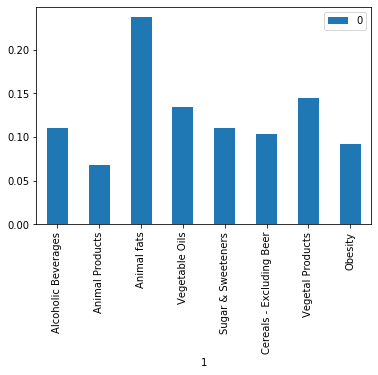

In [42]:
pd.DataFrame([x for x in zip(reg.feature_importances_, X.columns)]).plot(kind='bar', y=0, x=1)

### Looking at the feature importances, we can see that Animal fats, Vegetable Oils,  Animal Products seem to have  a high importance in predicting Deaths 

In [43]:
my_df = pd.DataFrame({
    'Alcoholic Beverages':[2.5],
    'Animal Products':[42.5],
    'Animal fats':[22.5],
    'Vegetable Oils':[2.5],
    'Sugar & Sweeteners':[2.5],
    'Cereals - Excluding Beer':[2.5],
    'Vegetal Products':[2.5],
    'Obesity':[32.5]
})

In [44]:
reg.predict(my_df)

array([9.773])